## CS559 - Final Exam (Summer 2020) 
This is the cumulative final exam. This test mainly contains coding questions are involved within problems. There are total of 5 problems from supervised and unsupervised learnings. Problems thru 1 and 3 are genernal regression and classification questions. Problem 4 requires EDA and feature engineering process to have the cleaned data and data analysis prior to do classification and Problem 5 is a continuous problem from #4 to understand the data from unsupervised learning. 

- Exam Duration: Expect to be done wihtin 2 or 3 hours. 
- Exam Submission: Have in html and ipynb formats.
- Exam Due: Friday 8/28th Friday 11:59 PM. 
- Rules: Using other sources except class notes and demonstration codes are prohibited. 

### Problem 1 (10 pts)
Create any multiple linear model. For example, it may be $y = 3x_1 + 5x_2 + \mu$ or $y = 4x_1 - 3x_2 + 9x_3 + \mu$. Then:

(a) generate random 30 observations depend on the model.

(b) fit a linear model depends on the observations generated by step (a), and record the coefficients.

(c) repeat (a) and (b) 100 times. Calculate the mean and variance of the coefficients.

(d) Explain your result. 

Note that each time the generated observations should come from the sample distribution. If you do not understand, just use the `random.rand` function. 


In [73]:
# ALL IMPORTS FOR ALL PROBLEMS
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import classification_report, zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

from scipy.spatial.distance import cdist

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 200)

In [ ]:
### Code Starts Here
coefs = []
ols = linear_model.LinearRegression()
np.random.seed(100)

# I am going to define my x variables as gaussian distributed.
n = 30
mu = 12

x1 = np.random.normal(loc=0, scale=3, size=n)
x2 = np.random.normal(loc=2, scale=5, size=n)
x3 = np.random.normal(loc=12, scale=4, size=n)

data = pd.DataFrame(data={'x1': x1, 'x2': x2, 'x3': x3})
data['y'] = data['x1'] * 4 - data['x2'] * 3 + data['x3'] * 9 + mu

model = linear_model.Lasso()
model.fit(data[['x1', 'x2', 'x3']], data['y'])

print(f'Here are the coeficients for the first linear model: {model.coef_}')

In [ ]:
accumulating_coefficients = list()
for _ in range(1000):
    x1 = np.random.normal(loc=0, scale=3, size=n)
    x2 = np.random.normal(loc=2, scale=5, size=n)
    x3 = np.random.normal(loc=12, scale=4, size=n)

    data = pd.DataFrame(data={'x1': x1, 'x2': x2, 'x3': x3})
    data['y'] = data['x1'] * 4 - data['x2'] * 3 + data['x3'] * 9 + mu

    model = linear_model.Lasso()
    model.fit(data[['x1', 'x2', 'x3']], data['y'])
    
    accumulating_coefficients.append(model.coef_)

stats = pd.DataFrame(accumulating_coefficients, columns=['coef_0', 'coef_1', 'coef_2'])
stats.describe()

Above, we can see the results of running the same experiment 100 times, we get coefficients that approximate the coefficiends of the actual data. That is, our original data was created with coefficients 4, -3, and 9. Our linear model gives us 3.87, -2.96, and 8.93. Essentially, what we are doing is exercising the central limit theorm. By taking all of these random samples of these coefficients, the mean of the results should approximate the actual population value. There is a big takeaway, however. Note, we don't actually get means that match our coefficients. At first glance, this appears incorrect, but its not! This is a result of using the Lasso model. Our regularization is pulling all of our coefficents down, in an effort to prevent overfitting. Note, all of our sampled coefficients are smaller than the actual value! We can show this to be true, by running the same experiment again, with the regularization turned off!

In [ ]:
x1 = np.random.normal(loc=0, scale=3, size=n)
x2 = np.random.normal(loc=2, scale=5, size=n)
x3 = np.random.normal(loc=12, scale=4, size=n)

data = pd.DataFrame(data={'x1': x1, 'x2': x2, 'x3': x3})
data['y'] = data['x1'] * 4 - data['x2'] * 3 + data['x3'] * 9 + mu

model = linear_model.Lasso(alpha=0)
model.fit(data[['x1', 'x2', 'x3']], data['y'])

print(f'Here are the coeficients for the un-regularized linear model: {model.coef_}')

Additionally, showed standard deviations rather than variances. Here are the variances. Note how small they are relative to the coefficient size.

In [ ]:
stats.var()

### Problem 2 (15 pts)
This question involves the use of simple linear regression on the Auto data set (In the file "Auto.csv"). Perform a simple linear regression with *mpg* as the response and *horsepower* as the predictor. 

(a) What is the coefficient of mpg? How to explain it?

(b) What is the coefficient of determination of the model? How to explain it?

(c) Write down the formula of the model.

(d) What is the predicted mpg associated with a horsepower of 98?

(e) Plot the response and the predictor as well as the least squares regression line.

(f) Find two other features that will make the prediction better using *Lasso* regularizer. Confirm your new model by calculating RMSE and justify your new model. 

In [ ]:
### Code Starts Here
data = pd.read_csv('Auto.csv')
data.head()

In [ ]:
model = linear_model.LinearRegression()
model.fit(data[['horsepower']], data['mpg'])

print(f'Here is the coefficient for the linear model: {model.coef_}')

Intuitively, this makes perfect sense. The higher horsepower of an engine should typically correspond to a lower MPG. That is, more powerful engines tend to have larger displacement, and thus require more gasoline to run. This is why our coefficient is (expectedly) negative.

In [ ]:
coef_deter = data.corr().loc['mpg']['horsepower'] ** 2  # coeficcient of determination is correlation coefficient squared

print(f'Here is the coefficient of dermination: {coef_deter}')

This is a fairly high correlation, which we expected from the first part of the question. Note, this measure gives us an idea on how well horsepower and mpg change with respect to each other, but does not show that it is an inverse relationship. This is because the coefficient of determination is a squared value (the correlation coefficient is expected to be negative, for the reasons above). Overall, 0.61 is a realtively high number.

Here is the formula for our model:

In [ ]:
print(f'MPG = {model.intercept_} - {abs(model.coef_[0])} * HORESEPOWER')

We can predict the mpg given a horsepower of 98 using the model, or our formula.

In [ ]:
our_pred = 39.93586102117047 - 0.15784473335365365 * 98
model_pred = model.predict([[98]])

print(f'"Our" prediction: {our_pred}')
print(f'Model prediction: {model_pred[0]}')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
plt.scatter(data['horsepower'], data['mpg'])

ax.set_ylabel('MPG', fontsize=24)
ax.set_xlabel("horsepower", fontsize=24)
ax.set_title('Horsepower vs MPG', fontsize=36)

slope, intercept = np.polyfit(data['horsepower'], data['mpg'], 1)
line_x = ax.get_xlim()
line_y = [intercept + slope*x for x in line_x]
plt.plot(line_x, line_y, 'r')

plt.legend(['Least Squares Fit'], fontsize=18)

My plan was as follows: In order to find the two best features to add, I will do a search. First, I will train a model with all of the numerical features included. Then, I will iteratively remove the feature with the smallest coefficeint, and retrain. We will work our way back down to two additional features.

**However**, when I trained my first model using all of the features, only three features had non-zero coefficients! Thus, I do not need to do a search (the code I started to develop is commented below.

In [ ]:
data.head()

In [ ]:
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
y = data['mpg']

# I DO NOT NEED TO DO A SEARCH, FOR REASONS STATED ABOVE
# for iteration in range(4):
#     print('Training a model')
#     X = data[features]
#     model = linear_model.Lasso().fit(X, y)

X = data[features]
model = linear_model.Lasso().fit(X, y)
non_zero_features = [feature for feature, coefficient in zip(features, model.coef_) if coefficient != 0]

print(f"The three features (horsepower and two additional) to be used: {non_zero_features}")

In order to really evaluate our model, I will do a train/test split on the data, and we can compare the RMSE of the two models on the test dataset.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model_0 = linear_model.LinearRegression().fit(X_train[['horsepower']], y_train)
model_1 = linear_model.Lasso().fit(X_train, y_train)

pred_0 = model_0.predict(X_test[['horsepower']])
pred_1 = model_1.predict(X_test)

rmse_0 = mean_squared_error(y_test, pred_0) ** 0.5
rmse_1 = mean_squared_error(y_test, pred_1) ** 0.5

print(f'Simple Linear Model with 1 Feature(s) RMSE: {rmse_0}')
print(f'Lasso Linear Model with 3 Feature(s) RMSE: {rmse_1}')
print()
print(f'Percent decrease in RMSE: {(rmse_0 - rmse_1) / ((rmse_0 + rmse_1) / 2) * 100:.2f}%')

This is a huge improvement over our first model. We see a decrease in the RMSE around 30-40%! This changes depending on the random train test split, but is always significant.

### Problem 3 (20 pts)
This question involves the use of **SVM** and **Decision Trees** to classify whether the customer either purchased Citrus Hill or Minute Maid Orange Juice. 

(a) Split the data set into two parts: training set and test set(with *random_state=0*, and *test_size=1.0/2*).

(b) **Support vector machine**

   - (1) Fit a svm model on the training set, report the training error and test error.(Just use the **svm.SVC** with default setting.)
    
   - (2) Change the value of parameter $C$ from $10^{-3}$ to $10^3$, make a plot to watch how the training error and test error varies. You can choose the value of $C$ from the array `np.logspace(-3, 3, 300)`.
   
   - (3) Explain your bias-variance tradeoff. 

(c) **Decision Tree**
   - (1) Fit a decision tree model on the training set with the default setting.
    
   - (2) Set the depth of the tree from 1 to 30. Look the varies of the training error and test error.
    
   - (3) Use the function **grid_search.GridSearchCV** to find the best parameters. What's the best parameters? What's the best score? What's the training error and test error of the best model. The possible combination of the parameters may be:
   
   - (4) What are the first 5 important features?

In [ ]:
### Code Starts Here
data = pd.read_csv('OJ.csv')
data.columns = data.columns.str.lower()  # make the columns lowercase, this makes everything easier in the future
data.head()

Before we move on and train a model, there are a few cleanups required. First, storeid and store columns store redundant info, so we will get rid of 'store'. Secondly, as storeid is categorical, we will one-hot-encode that column. store7 is already a one-hot-encoded column, but I'll remove and replace it.

In [ ]:
X = data[[col for col in data.columns if col not in ('purchase', 'storeid', 'store7', 'store')]]
store_dummies = pd.get_dummies(data['storeid'])
store_dummies.columns = 'store' + store_dummies.columns.astype(str)
X = X.join(store_dummies)

X_train, X_test, y_train, y_test = train_test_split(X, data['purchase'], random_state=0, test_size=1.0/2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svm = SVC().fit(X_train_scaled, y_train)

train_predict = svm.predict(X_train_scaled)
test_predict = svm.predict(X_test_scaled)

print("SVM Training Error/Accuracy:")
print(classification_report(y_train, train_predict))
print()
print("SVM Test Error/Accuracy:")
print(classification_report(y_test, test_predict))

We can see our F1 score in the training set was 0.85, down to 0.82 with the test set. We can also look at the pure rate of misclassification.

In [ ]:
print(f'Percent of misclassifications in training set: {(train_predict - y_train).abs().sum() / len(y_train) * 100:.2f}%')
print(f'Percent of misclassifications in test set: {(test_predict - y_test).abs().sum() / len(y_test) * 100:.2f}%')

Now, we can do this in a loop with different values of C.

In [19]:
train_err = list()
test_err = list()

x_axis = np.logspace(-3, 3, 300)

for C in x_axis:
    svm = SVC(C=C).fit(X_train_scaled, y_train)
    train_err.append(zero_one_loss(y_train, svm.predict(X_train_scaled)))
    test_err.append(zero_one_loss(y_test, svm.predict(X_test_scaled)))    

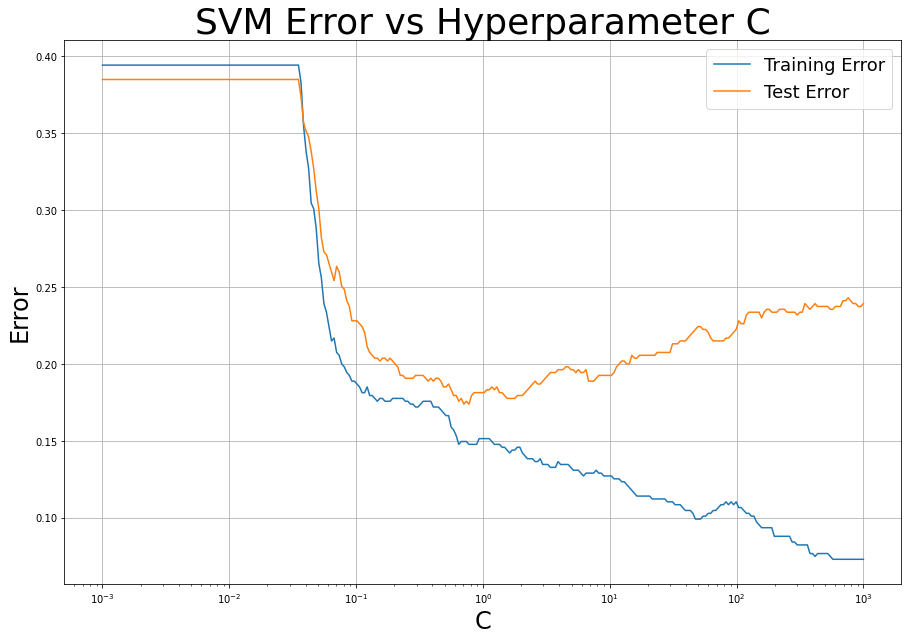

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
plt.plot(x_axis, train_err, x_axis, test_err)

plt.grid()
plt.legend(['Training Error', 'Test Error'], fontsize=18)
ax.set_xlabel('C', fontsize=24)
ax.set_ylabel('Error', fontsize=24)
ax.set_title("SVM Error vs Hyperparameter C", fontsize=36)
plt.xscale('log')

As we vary our value C, we cann see how the model performs on the training and test data. As C increases, we note that the training error decreases. The test error curve is more interesting, as the test error decreases for a while, and begins to increase near C=1. This plot illustrates very well what our bias-variance trade-off is.

By varying our value C, we are varying the complexity of the model. The more complex a model is, the more that model will "fit" itself to the training data. While this sounds good, it also means our model will begin to model the noise in the underlying data, rather than the actual relationships we are looking for. That is to say, as we increase the value C several things happen:  
1) we decrease regularization strength  
2) our model complexity increases  
3) our model increasingly models the noise in addition to the underlying signals of interest  
4) we have increased our variance, and decreased our bias.  

Because our model begins modeling noise more, our error rate in the test dataset begins to go up. This is not to see that lowering C in our scenario is always good. We can note that lowering C from C=1 also increases our error rate. This is because we are simplifying our model too much (over regularizing it), and our model increasingly can not model the signals that we are interested in. In this case, we are increasing our bias and decreasing our variance, but overall, increasing our error.

Thus it is clear there is a trade-off, and given all of the data above, we would like to set the value of C to be around 1 (perhaps slightly less).

#### Decision Tree

First, we train a tree with the default options.

In [21]:
dt = DecisionTreeClassifier().fit(X_train_scaled, y_train)

train_predict = dt.predict(X_train_scaled)
test_predict = dt.predict(X_test_scaled)

print(f'Percent of misclassifications in training set: {(train_predict - y_train).abs().sum() / len(y_train) * 100:.2f}%')
print(f'Percent of misclassifications in test set: {(test_predict - y_test).abs().sum() / len(y_test) * 100:.2f}%')

Percent of misclassifications in training set: 0.75%
Percent of misclassifications in test set: 23.18%


It is clear this model can be improved upon.

Text(0.5, 1.0, 'Decision Tree Error vs Max Depth')

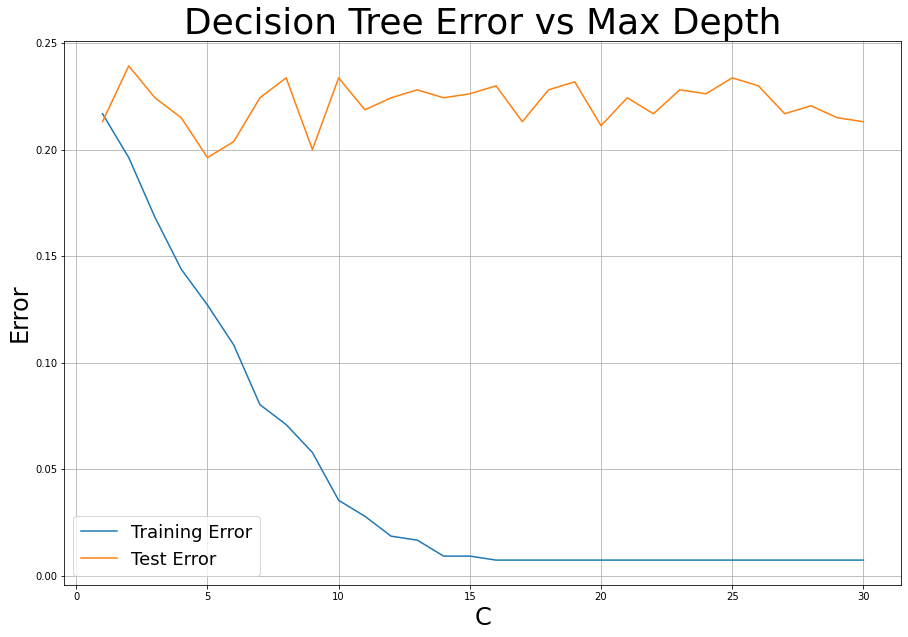

In [22]:
train_err = list()
test_err = list()

x_axis = list(range(1, 31))

train_err = list()
test_err = list()

for depth in x_axis:
    dt = DecisionTreeClassifier(max_depth=depth).fit(X_train_scaled, y_train)
    train_err.append(zero_one_loss(y_train, dt.predict(X_train_scaled)))
    test_err.append(zero_one_loss(y_test, dt.predict(X_test_scaled)))    
    
fig, ax = plt.subplots(1, 1, figsize=(15,10))
plt.plot(x_axis, train_err, x_axis, test_err)

plt.grid()
plt.legend(['Training Error', 'Test Error'], fontsize=18)
ax.set_xlabel('C', fontsize=24)
ax.set_ylabel('Error', fontsize=24)
ax.set_title("Decision Tree Error vs Max Depth", fontsize=36)


Depth alone is clearly not doing a great job improving our model. As we increase the depth, we overfit a bit, but this does not affect our test data much at all. We can now try a grid search.

In [23]:
dt = DecisionTreeClassifier()
dt_params = {'min_samples_leaf': [1, 5, 10],
             'min_samples_split': [2, 6, 12],
             'max_features': [None, 1, 5, 10, 15],
             'max_depth': [None, 10, 20, 30]}
dt_grid = GridSearchCV(estimator=dt,
                       param_grid=dt_params).fit(X_train_scaled, y_train)

In [24]:
print(f'Best parameters: {dt_grid.best_params_}')

Best parameters: {'max_depth': 30, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [25]:
print(f'Best score: {dt_grid.best_score_}')

Best score: 0.816822429906542


In [26]:
train_predict = dt_grid.best_estimator_.predict(X_train_scaled)
test_predict = dt_grid.best_estimator_.predict(X_test_scaled)

print(f'Percent of misclassifications in training set: {(train_predict - y_train).abs().sum() / len(y_train) * 100:.2f}%')
print(f'Percent of misclassifications in test set: {(test_predict - y_test).abs().sum() / len(y_test) * 100:.2f}%')

Percent of misclassifications in training set: 14.39%
Percent of misclassifications in test set: 20.93%


We've improved our model, but not by a significant margin.

In [27]:
feat_import = dt_grid.best_estimator_.feature_importances_
features = sorted(X.columns, key=lambda colname: feat_import[X.columns.get_loc(colname)], reverse=True)

In [28]:
print(f'The five most important features are: {features[:5]}')

The five most important features are: ['loyalch', 'listpricediff', 'pricediff', 'weekofpurchase', 'salepricemm']


### Problem 4 (35 pts)
This question involves ML project work starting from EDA to prediction. The data comes from a global company, including orders from 2012 to 2015. Import the dataset Order and do some basic EDA.

(a) Check “Profit” and “Sales” in the dataset, convert these two columns to numeric type and name them "New Profit" and "New Sales", respectively. 

(b) Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year’s inventory. He wants you to answer the following questions:
- Is there any seasonal sales trend in your company?
- Is there any seasonal trend of different categories of products?

(c) Your manager required you to give a brief report (Plots + Interpretations) on returned orders from the Returns dataset.

- How much profit did we lose for each year?
- How many customer returned more than once? more than 10 times?
- Which regions are more likely to return orders?
- Which categories (sub-categories) of products are more likely to be returned?
- Will different ship mode affect the possibility of return? Standard class is the most common ship mode, but it is not necessarily true that its return ratio is also the highest.
- Hint: 
    - Import Returns.csv
    - Merge the Returns dataframe you imported with the Orders dataframe.
    - One order might contains multiple products so you will have more observations after the merge.
    
(d) Add a column "Order_Month” with the month that the order was submitted.

(e) Generate a categorical variable which indicates whether an order has been returned or not.

(f) Generate a feature which can measure how long it takes the company to process each order. (Process.Time = Ship.Date - Order.Date)

(g) Generate a feature indictes how many times the product has been returned before.

(h) Predict which orders are most likely to be returned using **random forest** by selecting the following features and the 3 new feature to put into your model: “Ship.Mode”, “Segment”, “Region”, “Market”, “Category”, “Sub.Category”, “Quantity” “Discount”, “Shipping.Cost”, “Order.Priority”, “New_sales”, “New_profit”,“Order.Month”
- Using 80/20 training and test splits to build your model.
- Tuning the number of variables available for splitting at each tree node from 3 to 15.
- Select an apporatiate metric to evaluate your model.

In [29]:
### Code Starts Here
order_data = pd.read_csv('Orders.csv')
order_data.columns = order_data.columns.str.lower()
order_data.head()

,row.id,order.id,order.date,ship.date,ship.mode,customer.id,customer.name,segment,postal.code,city,state,country,region,market,product.id,category,sub.category,product.name,sales,quantity,discount,profit,shipping.cost,order.priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [30]:
# I don't want upper case letters and spaces in my column names please don't make me do that :)
order_data["new_profit"] = order_data['profit'].str.replace('$', '').str.replace(',', '').astype(float)
order_data["new_sales"] = order_data['sales'].str.replace('$', '').str.replace(',', '').astype(float)

To genenrate a report by season, I create a 'month' column, and run mod(4) on it. Essentially, I am breaking the year into quarters rather than meteorological seasons, but the effect is the same.

In [32]:
date = pd.to_datetime(order_data['order.date'])
order_data['year'] = date.apply(lambda dt: dt.year)
order_data['month'] = date.apply(lambda dt: dt.month)
order_data['season'] = order_data['month'] % 4

First and foremost, we can look at the raw number of orders

In [33]:
seasonal_orders = order_data.groupby(['season']).size()
seasonal_orders

season
0    14354
1    12356
2    12067
3    12513
dtype: int64

We get the most orders in the first quarter (0), which tapers down until the third quarter (2), and then back up to first quarter. So we are busiest around Jan-Feb every year. Next, we can look how this aligns with costs.

In [34]:
seasonal_sales = order_data.groupby(['season']).agg({'new_sales': 'sum', 
                                                     'new_profit': 'sum'}) / 1000
seasonal_sales

,new_sales,new_profit
season,,
0,3556.95740,396.51748
1,3024.03655,350.11646
2,3001.95961,376.44055
3,3059.55369,344.38218


Shown above, the unit is in thousands. As expected, our sales and profit are highest during our busy time, in the first quarter. Interestingly, though, our profit spikes in third quarter (season 2) even though were have fewer number of sales that time of year, and smaller total sales in $.   

Next, we can take a look at shipping priority. Broken out by percentage, is there a significant shift in shipping priority depending on quarter/season?

In [35]:
(order_data.groupby(['season', 'order.priority']).size().unstack(fill_value=0).divide(seasonal_orders, axis=0) * 100)[['Low', 'Medium', 'High', 'Critical']]

order.priority,Low,Medium,High,Critical
season,,,,
0,5.092657,57.781803,29.378570,7.746969
1,4.410813,57.534801,30.519586,7.534801
2,4.615895,56.907268,31.167647,7.309190
3,4.723088,57.244466,29.984816,8.047630


There is not a stark change in priority overall, but we can note a few things. There are a lot more high priority items in season "2", and a small increase in critical priority in season "3". Season "1" has the most low priority shipments.  

Next, we can take a look at the total number of orders in each market by season (Note, this could also have been done by $$).

In [36]:
order_data.groupby(['season', 'market']).size().unstack(fill_value=0).divide(seasonal_orders, axis=0) * 100

market,Africa,Asia Pacific,Europe,LATAM,USCA
season,,,,,
0,9.328410,27.225860,25.337885,18.036784,20.071060
1,8.926837,28.755261,22.304953,18.921981,21.090968
2,8.452805,30.496395,21.645811,23.046325,16.358664
3,8.990650,25.261728,21.769360,20.666507,23.311756


Africa's market is quite stable, season makes little difference. Asia pacific has the least amount of orders in season '3', monotonically increasing to the most orders in season '2'. Europe is mostly stable, with a spike in orders in season '0'. Latin America has fewer orders in the first half of the year, and more orders in the second half. USCA is relatively stable, with few orders in season '2'.  

Now, we can look at this by country. I will only observe the 5 countries with the largest seasonal swing.

In [37]:
country_count = order_data.groupby(['season', 'country']).size().unstack(fill_value=0).divide(seasonal_orders, axis=0) * 100
countries = (country_count.max() - country_count.min()).sort_values(ascending=False)[:5].index
country_count[countries]

country,United States,France,Australia,Indonesia,Mexico
season,,,,,
0,19.346524,6.736798,5.057824,2.675212,4.486554
1,20.475882,5.203949,6.191324,2.177080,5.131110
2,15.314494,5.287147,6.223585,3.314826,5.419740
3,22.688404,4.627188,4.755055,2.693199,5.618157


The US has the biggest swing in orders, with very little orders in season '2'. The other countries here are more stable throughout the year.  

Now, we can take a look at how different cetegories of items are ordered throughout the year. This is done by percentage.

In [38]:
order_data.groupby(['season', 'category']).size().unstack(fill_value=0).divide(seasonal_orders, axis=0) * 100

category,Furniture,Office Supplies,Technology
season,,,
0,18.782221,61.258186,19.959593
1,19.269990,61.710910,19.019100
2,19.516035,60.271816,20.212149
3,19.403820,60.720850,19.875330


There is not major swings in order category base on season. We see less furniture in season '0', more office supplies in the first half of the year, and a little more technology sales in season 2. Perhaps we can see more swings if we look more granular.

In [39]:
cat_count = order_data.groupby(['season', 'sub.category']).size().unstack(fill_value=0).divide(seasonal_orders, axis=0) * 100
cat_count

sub.category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
season,,,,,,,,,,,,,,,,,
0,6.186429,3.497283,9.781246,12.073290,4.667688,6.437230,4.347220,4.563188,5.016023,5.977428,4.932423,2.926014,6.841299,6.499930,9.906646,4.646788,1.699875
1,5.899968,3.447718,9.768534,12.115571,4.783101,6.668825,4.305601,4.750728,4.904500,6.231790,5.131110,2.686954,6.927808,6.126578,9.857559,4.807381,1.586274
2,5.776084,3.298251,9.016326,11.767631,4.806497,6.787105,4.408718,4.615895,5.229137,6.057844,5.411453,3.223668,6.613077,6.803679,9.521836,4.798210,1.864589
3,6.081675,3.324542,9.310317,11.955566,4.555263,6.928794,4.275553,4.699113,5.146647,6.353392,4.842963,2.757133,6.840885,6.760969,10.069528,4.531287,1.566371


The top five swings are shown below. 

In [40]:
(cat_count.max() - cat_count.min()).sort_values(ascending=False)[:5]

sub.category
Art         0.764920
Phones      0.677101
Labels      0.568489
Storage     0.547691
Machines    0.536714
dtype: float64

Art has the biggest seasonal change, more selling in the first half of the year. Phone, Storage, Labels, and Machines sales tend to lull in season 2.

### Returns

In [41]:
return_data = pd.read_csv('Returns.csv', usecols=[0, 1])
return_data.columns = return_data.columns.str.lower()

return_data.head()

,returned,order id
0,Yes,CA-2012-SA20830140-41210
1,Yes,IN-2012-PB19210127-41259
2,Yes,CA-2012-SC20095140-41174
3,Yes,IN-2015-JH158207-42140
4,Yes,IN-2014-LC168857-41747


In [42]:
return_data['returned'] = return_data['returned'].str.strip().map({'Yes': True, 'No': False})

final = order_data.merge(return_data, how='left', left_on='order.id', right_on='order id').drop(columns='order id')
final['returned'] = final['returned'].fillna(False)

In [43]:
# How much profit did we lose for each year?

final[final.returned].groupby('year').agg({'new_profit': sum})

,new_profit
year,
2012,17477.26
2013,9269.89
2014,17510.63
2015,17112.97


There are two ways we can look at this. Do we count every returned item as an individual return, or do we count an order_id as a single return?

In [44]:
num_returns = final.groupby('customer.id').agg({'returned': sum})

print(f'{num_returns.returned.gt(1).sum()} customers returned more than one item.')
print(f'{num_returns.returned.ge(10).sum()} customers returned more than ten items.')

547 customers returned more than one item.
4 customers returned more than ten items.


In [45]:
returns_by_order = final.groupby(['customer.id', 'order.id']).agg({'returned': sum}).reset_index()
num_returns = returns_by_order[returns_by_order.returned.ge(1)].groupby('customer.id').agg({'order.id': 'nunique'})

print(f"{num_returns['order.id'].gt(1).sum()} customers returned items from more than one order.")
print(f"{num_returns['order.id'].ge(10).sum()} customers returned items than more than ten orders.")

20 customers returned items from more than one order.
0 customers returned items than more than ten orders.


In [46]:
return_data = final.groupby('region').agg({'returned': [sum, np.mean]})

top5_country_returns = return_data.sort_values(('returned', 'mean'), ascending=False).index[:5]
print(f'Here are the five regions with the highest return rate: {", ".join(top5_country_returns)}')

Here are the five regions with the highest return rate: Western US, Eastern Asia, Southern Europe, Southern Africa, Southern US


In [47]:
return_by_category = final.groupby('sub.category').agg({'returned': [sum, np.mean]}).sort_values(('returned', 'mean'), ascending=False)
top5_cat_returns = return_by_category.index[:5]

print(f'Here are the five sub categories with the highest return rate: {", ".join(top5_cat_returns)}')

Here are the five sub categories with the highest return rate: Labels, Tables, Accessories, Art, Copiers


In [48]:
return_by_ship = final.groupby('ship.mode').agg({'returned': [sum, np.mean]}).sort_values(('returned', 'mean'), ascending=False)
return_by_ship

returned          
                    sum      mean
ship.mode                        
Standard Class   1392.0  0.045232
Same Day          120.0  0.044428
First Class       312.0  0.041572
Second Class      396.0  0.038413

Standard class orders do have the highest return rate, at 4.5%, followed closely by Same Day, which has a return rate of 4.4%. Second Class has the lowest return rate at 3.8%.

**I do note that these numbers could be alterered to take advantage of the quantity column, but I do not beleive that is necessary for this project**.

#### Add a column "Order_Month” with the month that the order was submitted.
This is already done for the first part, and the column has the name 'month'.

#### Generate a categorical variable which indicates whether an order has been returned or not.
This is already done from the previous step, where we merged in the returns dataset.

#### Generate a feature which can measure how long it takes the company to process each order.

In [49]:
# This feature will have a unit of days

ship_date = pd.to_datetime(final['ship.date'])
final['process.time'] = (ship_date - date).apply(lambda delta: delta.days)

#### Generate a feature indictes how many times the product has been returned before.
I am also goign to get a return rate.

In [50]:
prod_returns = final.groupby('product.name').agg({'returned': [sum, np.mean]}).reset_index()
prod_returns.columns = ['product.name', 'product.total_returns', 'product.return_rate']

final = final.merge(prod_returns, on='product.name')

In [51]:
final.head(1)

,row.id,order.id,order.date,ship.date,ship.mode,customer.id,customer.name,segment,postal.code,city,state,country,region,market,product.id,category,sub.category,product.name,sales,quantity,discount,profit,shipping.cost,order.priority,new_profit,new_sales,year,month,season,returned,process.time,product.total_returns,product.return_rate
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High,62.15,221.98,2014,11,3,False,2,0.0,0.0


## Random Forest

To use some of these categorical columns, we have to first one-hot-encode them. Ordered categoricals I could convert to ints, but I will use one-hot for all of them.

In [52]:
dummies = list()

for column in ('ship.mode', 'segment', 'region', 'market', 'category', 'sub.category', 'order.priority'):
    dummy_frame = pd.get_dummies(final[column])
    dummy_frame.columns = dummy_frame.columns.str.lower().str.replace(' ', '_')
    dummies.append(dummy_frame)
final_dummies = pd.concat(dummies, axis=1)

In [53]:
x_cols = ['quantity', 'discount', 'shipping.cost', 'new_sales', 'new_profit', 'month', 'product.total_returns', 'product.return_rate', 'process.time']

X = final[x_cols].join(final_dummies)
y = final.returned

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now, we can use GridSearchCV to find what number of variables to use when splitting.

In [54]:
rf = RandomForestClassifier()
rf_params = {'max_features': range(3, 16)}

rf_grid = GridSearchCV(estimator=rf,
                       param_grid=rf_params).fit(X_train, y_train)

In [55]:
print(f'Random forest grid search best parameters: {rf_grid.best_params_}')

Random forest grid search best parameters: {'max_features': 9}


Let's evaluate how our model does on the train and test sets.

In [56]:
rf = RandomForestClassifier(max_features=4).fit(X_train, y_train)

In [57]:
train_predict = rf.predict(X_train)
test_predict = rf.predict(X_test)

print(f'Percent of misclassifications in training set: {(train_predict - y_train.astype(int)).abs().sum() / len(y_train) * 100:.2f}%')
print(f'Percent of misclassifications in test set: {(test_predict - y_test.astype(int)).abs().sum() / len(y_test) * 100:.2f}%')

Percent of misclassifications in training set: 0.00%
Percent of misclassifications in test set: 4.36%


As expected, our model does very good on the train set, and has only 4.5% of the labels misclassified. However, a better way to look at this is a crosstabulation.

In [58]:
pd.crosstab(y_test, test_predict, colnames=['prediction'])

prediction,False,True
returned,,
False,9808,4
True,443,3


Here, our model does a fairly poor job with true positives. We have a high true negative count, with zero false positives. However, we have a number of false negatives, and almost zero true positives. Overal, this could be due to class imbalance; we have very little 'True' overall. This can be further seen numerically, below.

In [59]:
print(classification_report(y_test.astype(int),
                            test_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9812
           1       0.43      0.01      0.01       446

    accuracy                           0.96     10258
   macro avg       0.69      0.50      0.50     10258
weighted avg       0.93      0.96      0.94     10258



Here, we can see we have what appears to be a good model, until you notice our recall scores. We have a 0.01 recall and 0.01 f1-score for the returned class. Clearly, we need to improve this model.

### Problem 5 (20 pts)
This question continues from **Problem 4** to understand the behavior of returned orders by clusters using **KMeans** and visualize in 2-dimension using **PCA**. You can use the selected features in the previous model above. 

(a) Normalize the data.

(b) Cluster the data and choose the appropriate cluster number. 

(c) Explain the characteristics of each cluster. 

(d) Transform the data to 2-dimension for cluster visualization. 
    
   - use `cosine_similarity` from `sklearn.metrics.pairwise` to find distance.
   - Fit and tranform data. 
   - Plot. 

#### a)

In [60]:
normalizer = Normalizer()

X_normal = normalizer.fit_transform(X)

#### b)

In order to get the correct clusters, I will employ the elbow method. I am not doing a train test split for this, as I don't need to do model selection/tuning for the problem.

In [61]:
cluster_variances = dict()

for n_clusters in range(2, 30):
    model = KMeans(n_clusters=n_clusters)
    model.fit(X_normal)
    
    cluster_variances[n_clusters] = sum(np.min(cdist(X_normal, model.cluster_centers_, 'euclidean'), axis=1)) / X_normal.shape[0]

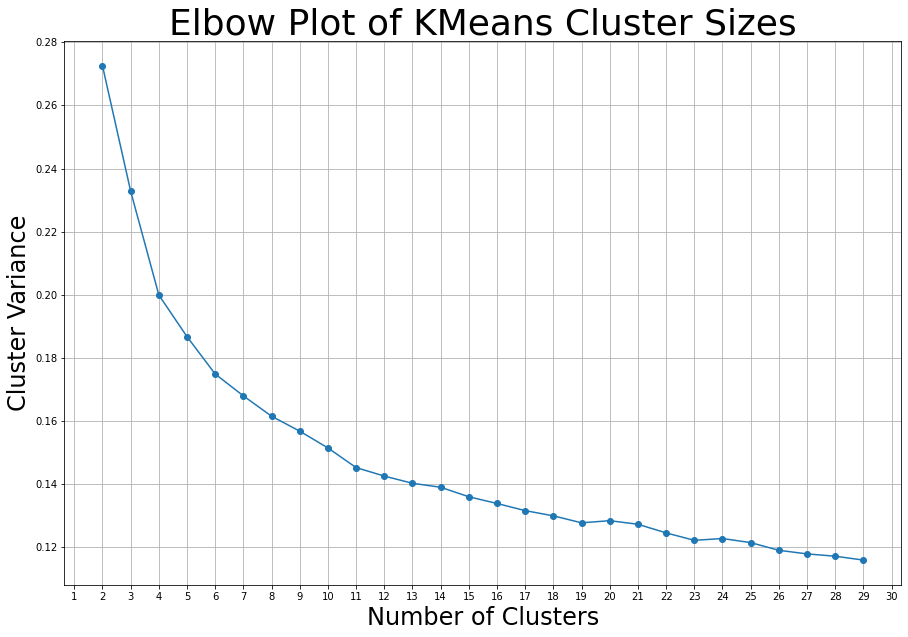

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
plt.plot(list(cluster_variances.keys()), list(cluster_variances.values()), '-o')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))

ax.set_xlabel('Number of Clusters', fontsize=24)
ax.set_ylabel('Cluster Variance', fontsize=24)
ax.set_title('Elbow Plot of KMeans Cluster Sizes', fontsize=36)
plt.grid()

From here, it looks like the elbow is between 8 and 11. I'm going to try 11 clusters.

In [63]:
model = KMeans(n_clusters=11)
model.fit(X_normal)

cluster_gb = pd.DataFrame(X_normal, columns=X.columns).groupby(model.labels_)

In [64]:
cluster_mean = cluster_gb.agg(np.mean)
cluster_mean

,quantity,discount,shipping.cost,new_sales,new_profit,month,product.total_returns,product.return_rate,process.time,first_class,same_day,second_class,standard_class,consumer,corporate,home_office,canada,caribbean,central_africa,central_america,central_asia,central_us,eastern_africa,eastern_asia,eastern_europe,eastern_us,north_africa,northern_europe,oceania,south_america,southeastern_asia,southern_africa,southern_asia,southern_europe,southern_us,western_africa,western_asia,western_europe,western_us,africa,asia_pacific,europe,latam,usca,furniture,office_supplies,technology,accessories,appliances,art,binders,bookcases,chairs,copiers,envelopes,fasteners,furnishings,labels,machines,paper,phones,storage,supplies,tables,critical,high,low,medium
0,0.029265,0.000188,0.100902,0.914167,0.370907,0.053565,0.009119,0.000369,0.032726,0.001430,0.000575,0.001828,0.004849,0.004455,0.002595,0.001632,0.000101,0.000255,0.000167,0.000938,0.000026,0.000329,1.308435e-04,0.000494,0.000401,0.000530,0.000308,0.000376,0.000450,0.000419,0.000177,0.000114,0.000620,0.000398,0.000282,0.000113,0.000246,0.001122,0.000685,8.334519e-04,0.002013,0.002296,0.001612,0.001927,0.001048,0.006531,0.001103,0.000559,0.000184,0.001084,0.001206,0.000134,0.000268,0.000143,0.000726,0.000501,0.000638,0.000498,0.000138,0.001191,0.000263,0.000618,0.000524,0.000009,0.000790,0.002745,0.000324,0.004824
1,0.138191,0.038473,0.105859,0.582826,-0.461946,0.461204,0.072037,0.002751,0.257405,0.009621,0.002668,0.013414,0.038080,0.032278,0.018880,0.012624,0.000000,0.000584,0.000000,0.003625,0.001224,0.006137,1.437675e-03,0.000719,0.000000,0.003397,0.000000,0.001629,0.001722,0.005993,0.004846,0.000000,0.000893,0.000253,0.002379,0.010186,0.015616,0.001952,0.001191,1.162331e-02,0.025019,0.003834,0.010202,0.013104,0.003410,0.059883,0.000489,0.000367,0.000540,0.007534,0.022107,0.000000,0.000112,0.000000,0.003828,0.008570,0.003297,0.008755,0.000078,0.002840,0.000043,0.003686,0.002022,0.000000,0.004465,0.019239,0.003056,0.037022
2,0.087399,0.004620,0.105482,0.916056,0.047460,0.266877,0.044024,0.001616,0.143196,0.005327,0.001818,0.007595,0.021376,0.019069,0.010765,0.006282,0.000307,0.002022,0.000643,0.005432,0.000093,0.001113,6.965892e-04,0.001255,0.001377,0.001176,0.001216,0.001426,0.003313,0.002498,0.002958,0.000514,0.001655,0.001083,0.000773,0.000560,0.001396,0.003748,0.000862,3.628738e-03,0.010670,0.007635,0.009952,0.004231,0.002056,0.032218,0.001842,0.001207,0.000222,0.004820,0.006720,0.000012,0.000246,0.000000,0.002597,0.004810,0.001788,0.004894,0.000104,0.002566,0.000531,0.003635,0.001954,0.000011,0.002914,0.010467,0.001889,0.020847
3,0.125329,0.004193,0.108451,0.707237,0.194253,0.525832,0.070066,0.002812,0.249641,0.008499,0.003155,0.012537,0.038104,0.032640,0.018090,0.011565,0.000804,0.002386,0.000975,0.006524,0.000291,0.005178,1.036276e-03,0.001225,0.002898,0.007848,0.002308,0.001203,0.001875,0.002936,0.001687,0.000955,0.001978,0.001193,0.003867,0.001035,0.001904,0.002995,0.009195,6.308660e-03,0.008960,0.008289,0.011846,0.026892,0.002724,0.058797,0.000775,0.000416,0.000431,0.007949,0.016984,0.000000,0.000000,0.000000,0.002989,0.007020,0.002724,0.011881,0.000019,0.007342,0.000340,0.002680,0.001521,0.000000,0.004481,0.019010,0.003043,0.035762
4,0.040373,0.011453,0.064353,0.545508,-0.802150,0.102137,0.019018,0.000746,0.064685,0.002652,0.001132,0.003323,0.009846,0.009246,0.005059,0.002648,0.000000,0.000167,0.000000,0.000067,0.000841,0.002043,8.605898e-04,0.000022,0.000000,0.000027,0.000000,0.000621,0.000033,0.001094,0.000003,0.000000,0.000032,0.000091,0.000000,0.006151,0.004676,0.000183,0.000042,7.011294e-03,0.005607,0.000894,0.001329,0.002112,0.002317,0.012211,0.002425,0.000831,0.000786,0.002771,0.003113,0.000333,0.000699,0.000255,0.000784,0.000689,0.001182,0.000417,0.000633,0.000930,0.000706,0.001808,0.000913,0.000102,0.001366,0.005660,0.000773,0.009155
5,0.025963,0.000261,0.105178,0.961740,0.218328,0.052000,0.008471,0.000337,0.031394,0.001332,0.000481,0.001756,0.004653,0.004243,0.002450,0.00

Let's look at the 11 features with the highest range in mean.

In [65]:
mean_diff = (cluster_mean.min() - cluster_mean.max()).abs().sort_values(ascending=False)
mean_diff.index[:5]
cluster_mean[mean_diff.index[:11]]

,new_profit,month,new_sales,process.time,quantity,product.total_returns,office_supplies,shipping.cost,standard_class,medium,usca
0,0.370907,0.053565,0.914167,0.032726,0.029265,0.009119,0.006531,0.100902,0.004849,0.004824,0.001927
1,-0.461946,0.461204,0.582826,0.257405,0.138191,0.072037,0.059883,0.105859,0.038080,0.037022,0.013104
2,0.047460,0.266877,0.916056,0.143196,0.087399,0.044024,0.032218,0.105482,0.021376,0.020847,0.004231
3,0.194253,0.525832,0.707237,0.249641,0.125329,0.070066,0.058797,0.108451,0.038104,0.035762,0.026892
4,-0.802150,0.102137,0.545508,0.064685,0.040373,0.019018,0.012211,0.064353,0.009846,0.009155,0.002112
5,0.218328,0.052000,0.961740,0.031394,0.025963,0.008471,0.005571,0.105178,0.004653,0.004541,0.001281
6,-0.524238,0.096591,0.818532,0.058694,0.048320,0.016308,0.011117,0.090955,0.008631,0.008576,0.001509
7,-0.044191,0.741244,0.373627,0.341763,0.135828,0.087362,0.077471,0.116025,0.054016,0.050215,0.044643
8,0.311855,0.251214,0.869888,0.141876,0.098009,0.039457,0.032653,0.098739,0.021548,0.020444,0.013375
9,-0.218355,0.074143,0.953665,0.041885,0.035953,0.011056,0.006689,0.103426,0.006308,0.006134,0.001272


We can also look at features with the highest std in the mean.

In [66]:
mean_std = cluster_mean.std().sort_values(ascending=False)
mean_std.index[:5]
cluster_mean[mean_std.index[:11]]

,new_profit,month,new_sales,process.time,quantity,product.total_returns,office_supplies,standard_class,medium,usca,consumer
0,0.370907,0.053565,0.914167,0.032726,0.029265,0.009119,0.006531,0.004849,0.004824,0.001927,0.004455
1,-0.461946,0.461204,0.582826,0.257405,0.138191,0.072037,0.059883,0.038080,0.037022,0.013104,0.032278
2,0.047460,0.266877,0.916056,0.143196,0.087399,0.044024,0.032218,0.021376,0.020847,0.004231,0.019069
3,0.194253,0.525832,0.707237,0.249641,0.125329,0.070066,0.058797,0.038104,0.035762,0.026892,0.032640
4,-0.802150,0.102137,0.545508,0.064685,0.040373,0.019018,0.012211,0.009846,0.009155,0.002112,0.009246
5,0.218328,0.052000,0.961740,0.031394,0.025963,0.008471,0.005571,0.004653,0.004541,0.001281,0.004243
6,-0.524238,0.096591,0.818532,0.058694,0.048320,0.016308,0.011117,0.008631,0.008576,0.001509,0.007629
7,-0.044191,0.741244,0.373627,0.341763,0.135828,0.087362,0.077471,0.054016,0.050215,0.044643,0.042572
8,0.311855,0.251214,0.869888,0.141876,0.098009,0.039457,0.032653,0.021548,0.020444,0.013375,0.018644
9,-0.218355,0.074143,0.953665,0.041885,0.035953,0.011056,0.006689,0.006308,0.006134,0.001272,0.005662


There are several features that vary widely among the clusters. These features can be though of as important to all of the cluster definitions. Namely: new_profit, month, new_sales, process.time, and quantity are features important to most of the cluster definitions. In addition to this, here is a breakout of some of the specific characteristics describing several of the clusters (not fully descriptive, of course).

0) High new_sales, low quantity orders, low products with high return rates.  
1) No shipments to canada, africa, and east europe.  
2) Higher quantities than average, and products with a higher total_returns.  
3) Profitable orders, few discounts, few appliances storage and supplies.  
4) More orders to eastern asia, oceana, and western europe. Lots of accessories.  
5) Higher quantities than average, and products with a higher total_returns.  Lots of envelopes, storage and supplies to non-US regions.  
6) Least same_day orders, least orders to central_us, northern_europe, and least critical severety.  
7) More tables and chairs than average.  
8) Largely by low profits overall.   
9) Tends to low new_sales. Fast process.time, high product.total_returns   
10) No easily defined label. "None of the above"

In [67]:
cluster_mean.loc[:, cluster_mean.idxmax().eq(0)]

,new_profit
0,0.370907
1,-0.461946
2,0.047460
3,0.194253
4,-0.802150
5,0.218328
6,-0.524238
7,-0.044191
8,0.311855
9,-0.218355


In [68]:
cluster_mean.loc[:, cluster_mean.idxmin().eq(0)]

,discount,asia_pacific,furniture,appliances,storage,supplies
0,0.000188,0.002013,0.001048,0.000184,0.000618,0.000524
1,0.038473,0.025019,0.003410,0.000540,0.003686,0.002022
2,0.004620,0.010670,0.002056,0.000222,0.003635,0.001954
3,0.004193,0.008960,0.002724,0.000431,0.002680,0.001521
4,0.011453,0.005607,0.002317,0.000786,0.001808,0.000913
5,0.000261,0.002175,0.001328,0.000275,0.000879,0.000670
6,0.007980,0.007130,0.002277,0.000246,0.001338,0.001369
7,0.027829,0.014077,0.003578,0.000875,0.001413,0.001485
8,0.001135,0.005660,0.002180,0.000289,0.001764,0.001355
9,0.004135,0.004491,0.002341,0.000186,0.001307,0.000689


### PCA

In [70]:
means = pd.DataFrame(X_normal, columns=X.columns).mean()
# X_normal_zeromean = pd.DataFrame(X_normal, columns=X.columns).subtract(means, axis=1)

scatter = np.zeros((X_normal.shape[0]))

In [71]:
X_normal.shape[0]

51290

In [77]:
scatter = cosine_similarity(X_normal.T)

In [78]:
print(scatter.shape)

(68, 68)


In [80]:
w, v = np.linalg.eig(scatter)

In [118]:
X_PCA = pd.DataFrame(np.matmul(X_normal, v[:, :2]), columns=['X', 'Y'])

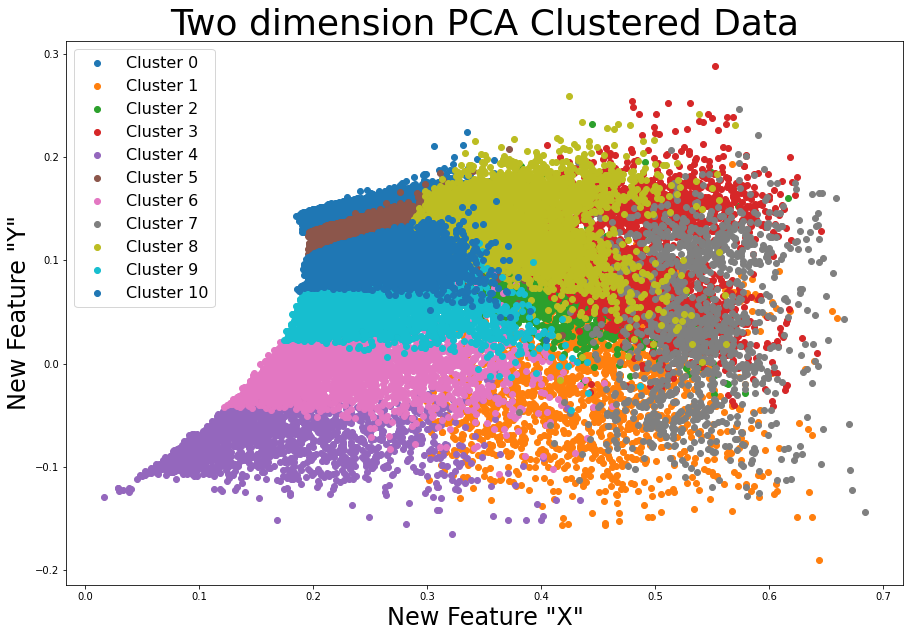

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

gb = X_PCA.groupby(model.labels_)
for group, data in gb:
    plt.scatter(data.X, data.Y)
    
ax.set_title('Two dimension PCA Clustered Data', fontsize=36)
ax.set_xlabel('New Feature "X"', fontsize=24)
ax.set_ylabel('New Feature "Y"', fontsize=24)

ax.legend([f'Cluster {n}' for n in range(11)], fontsize=16)

Our PCA worked, our clusters are beautiful!